In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D
from keras.layers import Convolution2D as Conv2D

In [2]:
import cv2
import numpy as np

In [3]:
train_path = 'dataset/train'
test_path = 'dataset/test'

In [4]:
activities = os.listdir(train_path)
num_classes = len(activities)

In [5]:
train_frames = []
train_labels = []
for i, activity in enumerate(activities):
    activity_path = os.path.join(train_path, activity)
    for video_file in os.listdir(activity_path):
        video_path = os.path.join(activity_path, video_file)
        cap = cv2.VideoCapture(video_path)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            resized_frame = cv2.resize(frame, (64, 64))
            train_frames.append(resized_frame)
            train_labels.append(i)
        cap.release()

In [6]:
# Convert training frames and labels to numpy arrays
X_train = np.array(train_frames)
y_train = np.array(train_labels)

In [7]:
# Load testing video frames and labels
test_frames = []
test_labels = []
for i, activity in enumerate(activities):
    activity_path = os.path.join(test_path, activity)
    for video_file in os.listdir(activity_path):
        video_path = os.path.join(activity_path, video_file)
        cap = cv2.VideoCapture(video_path)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            resized_frame = cv2.resize(frame, (64, 64))
            test_frames.append(resized_frame)
            test_labels.append(i)
        cap.release()
print("done")

done


In [8]:
# Convert testing frames and labels to numpy arrays
X_test = np.array(test_frames)
y_test = np.array(test_labels)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0
# Convert labels to one-hot vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [9]:
# Step 2: Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\malve\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Step 3: Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.6118 - loss: 1.0425 - val_accuracy: 0.4480 - val_loss: 2.3425
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9702 - loss: 0.1073 - val_accuracy: 0.4888 - val_loss: 3.9191
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9942 - loss: 0.0276 - val_accuracy: 0.4814 - val_loss: 4.0027
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.4944 - val_loss: 4.5635
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.5204 - val_loss: 4.7963
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.5093 - val_loss: 4.7841
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.5000 - val_loss: 5.5774
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9972 - loss: 0.0052 - val_accuracy: 0.5130 - v

In [11]:
# Step 4: Save the trained model
model.save('models.h5')

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import load_model
# Load the trained model
model = load_model('models.h5')

# Make predictions on the training data
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis=1)

# Convert the true labels to their corresponding class index
y_train_true = np.argmax(y_train, axis=1)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_true, y_train_pred)

# Calculate precision, recall, and F1-score
train_precision = precision_score(y_train_true, y_train_pred, average='macro')
train_recall = recall_score(y_train_true, y_train_pred, average='macro')
train_f1 = f1_score(y_train_true, y_train_pred, average='macro')

# Print the evaluation metrics
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-score: {train_f1:.2f}')


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Training Accuracy: 100.00%
Training Precision: 1.00
Training Recall: 1.00
Training F1-score: 1.00


In [13]:
from sklearn.metrics import classification_report

# Load the trained model
model = load_model('models.h5')

# Make predictions on the training data
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis=1)

# Convert the true labels to their corresponding class index
y_train_true = np.argmax(y_train, axis=1)

# Generate classification report
train_report = classification_report(y_train_true, y_train_pred, target_names=activities)

# Print the classification report
print("Training Classification Report:")
print(train_report)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Training Classification Report:
              precision    recall  f1-score   support

        bear       1.00      1.00      1.00       200
     Cheetah       1.00      1.00      1.00       150
    elephant       1.00      1.00      1.00       347
        lion       1.00      1.00      1.00       391
       tiger       1.00      1.00      1.00       130

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218



39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


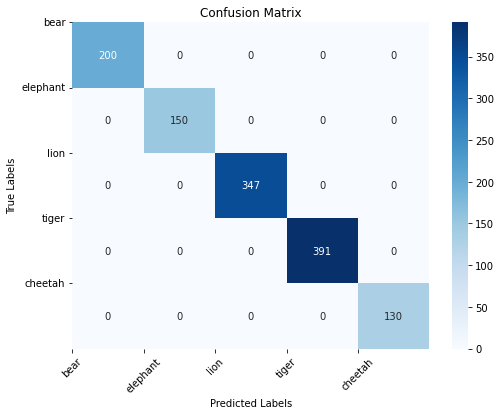

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # Correct the import statement for matplotlib
from tensorflow.keras.models import load_model  # Assuming you are using TensorFlow/Keras
import numpy as np

# Load the trained model
model = load_model('models.h5')

# Make predictions on the training data
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred, axis=1)

# Convert the true labels to their corresponding class index
y_train_true = np.argmax(y_train, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_train_true, y_train_pred)

# Define the class labels
class_labels = ['bear','elephant','lion','tiger','cheetah']  # Replace with your class labels

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels for x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set x-tick and y-tick labels
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels, rotation=0)

# Set title for the plot
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [20]:
###Testing 

In [15]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('models.h5')

# Define the activities (classes)
activities = ['bear','elephant','lion','tiger','cheetah'] # Replace with your actual activity labels

# Load the test video
test_video_path = 'Cheetah_1.mp4'  # Replace with the path to your test video
cap = cv2.VideoCapture(test_video_path)

# Get the video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create an output video writer
output_video_path = 'Lion1.mp4'  # Replace with the desired output video path
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Read the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame (resize and normalize)
    resized_frame = cv2.resize(frame, (64, 64))
    normalized_frame = resized_frame / 255.0

    # Add the batch dimension
    input_frame = np.expand_dims(normalized_frame, axis=0)

    # Make prediction on the input frame
    pred = model.predict(input_frame)
    pred_label = np.argmax(pred)
    activity = activities[pred_label]

    # Draw the predicted activity label on the frame
    cv2.putText(frame, activity, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0 , 255), 2)

    # Write the frame to the output video
    out.write(frame)

    # Display the frame with labeled activity
    cv2.imshow('Predicted Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and output video writer
cap.release()
out.release()

# Destroy all OpenCV windows
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

KeyboardInterrupt: 